<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy as sp
from scipy import signal
from scipy import interpolate
from scipy.interpolate import CubicSpline
from datetime import timedelta, datetime

# Importing Data

## Importing Hourly Resolution Data

### Obtaining Longitudes and Latitudes from All Stations

We start by reading the first two lines of the data file to obtain the longitude and latitude information of the stations. We zip them together into a list of tuples, and add an element to the beginning of this list corresponding to the time.

In [3]:
lon_and_lat = np.genfromtxt('AllStations_temperature_h_2017.dat', delimiter=" ", max_rows=2)
longitudes = lon_and_lat[0][~np.isnan(lon_and_lat[0])]
latitudes = lon_and_lat[1][~np.isnan(lon_and_lat[1])]

indices = list(zip(longitudes, latitudes))
indices.insert(0, "time")

### Reading the Temperature Data

We now read in the temperature data, skipping the first two rows that contain the longitude and latitude information of the stations. The column names of the dataframe are the longitude and latitude tuples created above, and the index column is the timestamps.

In [4]:
df = pd.read_csv('AllStations_temperature_h_2017.dat', sep='\s+', skiprows=[0,1], names=indices, index_col = 'time')
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
time,,,,,,,,,,,,,,,,,,,,,
733408.0000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
733408.0417,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
733408.0833,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
733408.1250,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
733408.1667,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Changing the Datetimes into Appropriate Timestamps

The Datetimes used in this file are MATLAB datetimes. We use a function to convert each time in the time column to the appropriate timestamp and then change the index column into timestamps.

In [5]:
def matlab_to_python_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

df.index = [matlab_to_python_datetime(i) for i in df.index]
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
2008-01-01 00:00:00.000000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
2008-01-01 01:00:02.879995,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2008-01-01 01:59:57.120005,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
2008-01-01 03:00:00.000000,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
2008-01-01 04:00:02.879995,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Finding the Required Station

These are the coordinates where we wish to measure the temperature. We look for the station nearest to this point.

In [6]:
station_lon = 236.691
station_lat =  48.462

In [7]:
lon_diff = abs(longitudes - station_lon)
lat_diff = abs(latitudes - station_lat)

station_num = list((lon_diff+lat_diff)).index(min(lon_diff+lat_diff))
df = df.iloc[:,station_num]

station_num provides the column number of the data we wish to observe.

# Part A

Obtain the Appropriate Data. Note that times_float is used for interpolation because it has numeric values, but times retains the timestamp nature for plotting.

In [8]:
time_start = pd.Timestamp(year=2016, month=1, day=1, hour=0)
time_end = pd.Timestamp(year=2016, month=12, day=31, hour=23)

data = df[(df.index>time_start) & (df.index<time_end)].fillna(method='ffill')
times_float = np.arange(0, len(data.values), 1)
times = time_start + np.array([timedelta(hours=int(t)) for t in times_float])

Obtain 0.6 and 0.45 day sampling rates:

In [9]:
f = interpolate.interp1d(times_float, data.values, 'cubic')

times_06_float = np.arange(0, len(data.values), 0.6*24)
times_045_float = np.arange(0, len(data.values), 0.45*24)
times_06 = time_start + np.array([timedelta(hours=int(t)) for t in times_06_float])
times_045 = time_start + np.array([timedelta(hours=int(t)) for t in times_045_float])

data_06 = f(times_06_float)
data_045 = f(times_045_float)

# Part B

Interpolate to get hourly resolution.

In [10]:
f_06_interp = CubicSpline(times_06_float, data_06)
data_06_interp = f_06_interp(times_float)

f_045_interp = CubicSpline(times_045_float, data_045)
data_045_interp = f_045_interp(times_float)

# Part C

## Plots

Set min and max plotting values.

In [11]:
x_min = pd.Timestamp(year=2016, month=5, day=1, hour=0)
x_max = pd.Timestamp(year=2016, month=5, day=31, hour=23)

0.6 day Sample Rate.

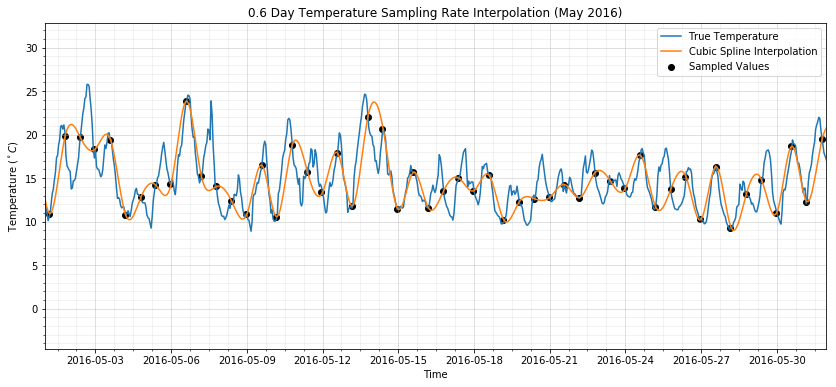

In [12]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(times, data, label='True Temperature')
ax.scatter(times_06, data_06, color='k', label='Sampled Values')
ax.plot(times, data_06_interp, label='Cubic Spline Interpolation')

ax.set_title('0.6 Day Temperature Sampling Rate Interpolation (May 2016)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature ($^\circ C$)')

ax.set_xlim(x_min, x_max)

ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()


plt.show()

0.45 Day Sampling Rate

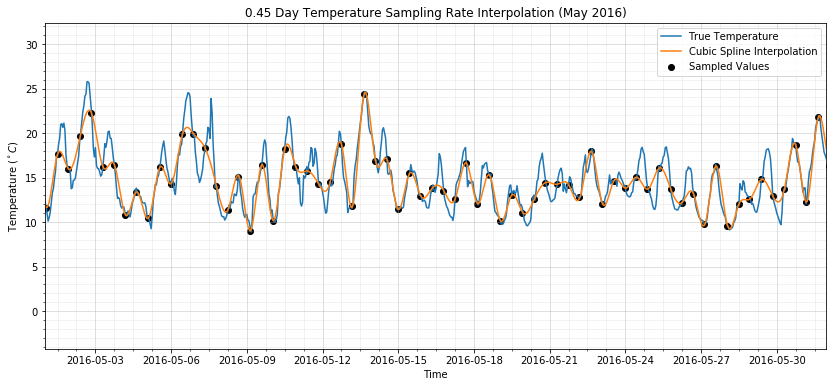

In [13]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(times, data, label='True Temperature')
ax.scatter(times_045, data_045, color='k', label='Sampled Values')
ax.plot(times, data_045_interp, label='Cubic Spline Interpolation')

ax.set_title('0.45 Day Temperature Sampling Rate Interpolation (May 2016)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature ($^\circ C$)')

ax.set_xlim(x_min, x_max)

ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()


plt.show()

# Part D

## Plots

### 0.6 Day

Compute the periodogram for 0.6 sampling frequency.

In [14]:
f_act, Gxx_act = sp.signal.periodogram(data, fs=1/3600)
f_06, Gxx_06 = sp.signal.periodogram(data_06, fs=1/(0.6*24*3600))
f_06_interp, Gxx_06_interp = sp.signal.periodogram(data_06_interp, fs=1/3600)

Make a plot.

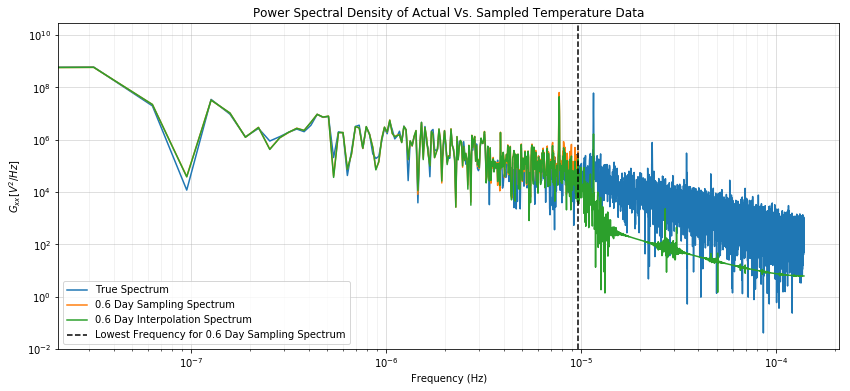

In [15]:
fig, ax = plt.subplots(figsize=(14,6))

ax.loglog(f_act, Gxx_act, label='True Spectrum')
ax.loglog(f_06, Gxx_06, label='0.6 Day Sampling Spectrum')
ax.loglog(f_06_interp, Gxx_06_interp, label='0.6 Day Interpolation Spectrum')


ax.set_title('Power Spectral Density of Actual Vs. Sampled Temperature Data')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$G_{xx}[V^2/Hz]$')

ax.set_ylim(bottom=0.01)

ax.axvline(0.5/(0.6*24*3600), c='k', linestyle='--', label='Lowest Frequency for 0.6 Day Sampling Spectrum') #Nyquist Frequency

ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()


plt.show()

### 0.45 Day

Compute the periodogram for 0.45 day sampling frequency.

In [16]:
f_act, Gxx_act = sp.signal.periodogram(data, fs=1/3600)
f_045, Gxx_045 = sp.signal.periodogram(data_045, fs=1/(0.45*24*3600))
f_045_interp, Gxx_045_interp = sp.signal.periodogram(data_045_interp, fs=1/3600)

Make a plot.

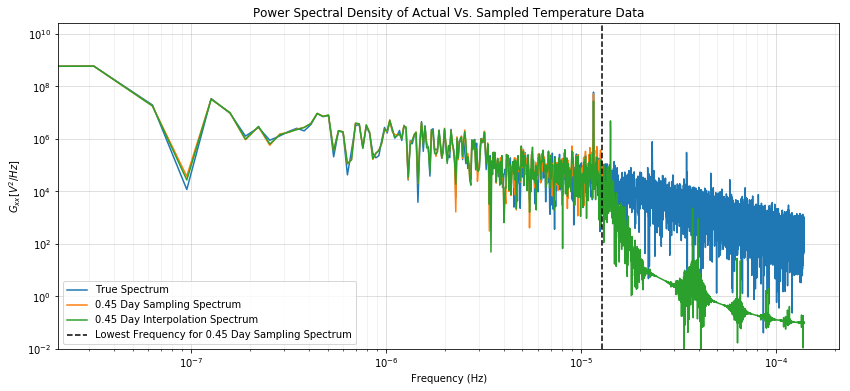

In [17]:
fig, ax = plt.subplots(figsize=(14,6))

ax.loglog(f_act, Gxx_act, label='True Spectrum')
ax.loglog(f_045, Gxx_045, label='0.45 Day Sampling Spectrum')
ax.loglog(f_045_interp, Gxx_045_interp, label='0.45 Day Interpolation Spectrum')


ax.set_title('Power Spectral Density of Actual Vs. Sampled Temperature Data')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$G_{xx}[V^2/Hz]$')

ax.set_ylim(bottom=0.01)

ax.axvline(0.5/(0.45*24*3600), c='k', linestyle='--',
           label='Lowest Frequency for 0.45 Day Sampling Spectrum') #Nyquist Frequency

ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()


plt.show()

## Conclusion

The true, sampled, and interpolated spectra are consistent up to the cutoff frequency (black dotted line) for the lower sampled data (orange curve). After this point, the true and interpolated spectra are very inconsistent. This result shows that **interpolation cannot be used to obtain frequency information at frequencies greater than the nyquist frequency.**

This makes sense, since we aren't collecting sufficient information (aren't sampling high enough) to make claims about the higher frequencies of the data. While cubic interpolation, by chance, might agree with the true spectrum, in this case it doesn't. In general, one should not use interpolation to gain insight on higher frequencies of a data set.

# Part E

Already completed... see above.

# Part F

## 0.6 Day Sampling Rate

In [18]:
err = (1/(len(data)))*np.sqrt(sum((data-data_06_interp)**2))
err

0.02300491483823496

## 0.45 Day Sampling Rate

In [19]:
err = (1/(len(data)))*np.sqrt(sum((data-data_045_interp)**2))
err

0.012553869879539178

The slower the sampling rate, the larger error we get from the true data set. Interpolation does not mitigate this effect; the slower sampling rate (0.6 days) still has a larger error than the faser sampling rate (0.45 days).